# 회귀분석 = 독립변수와 종속변수가 모두 연속형인 경우 인과관계 파악하기 위해

In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv("bank.csv", sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


- 데이터 탐색

- 상관분석

In [3]:
from scipy import stats

In [4]:
corr = stats.pearsonr(bank.age, bank.balance) #p - value값을 통해 통계적으로 유의한지 확인
corr

(0.08382014224477764, 1.658480874647685e-08)

- 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='balance'>

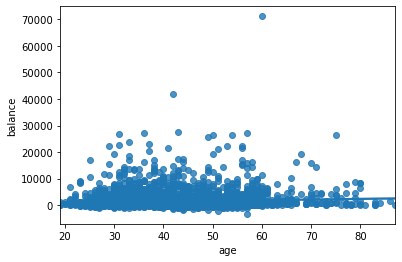

In [6]:
sns.regplot("age", "balance", bank)

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='age'>

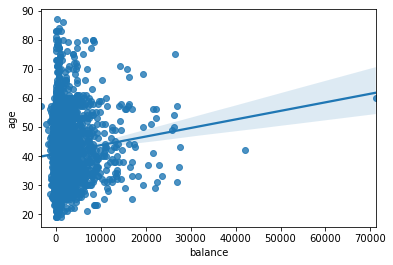

In [7]:
sns.regplot("balance", "age", bank)

- 회귀분석

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
linear_model = smf.ols(formula = "balance ~ age", data = bank).fit()

In [10]:
linear_model

In [11]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.97
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.66e-08
Time:                        20:36:42   Log-Likelihood:                -42610.
No. Observations:                4521   AIC:                         8.522e+04
Df Residuals:                    4519   BIC:                         8.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    440.6511    179.303      2.458      0.014      89.129     792.173
age           23.8524      4.218      5.655      0.000      15.583      32.122
==============================================================================
Omnibus:                     5648.224   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1475688.206
Skew:                           6.557   Prob(JB):                         0.00
Kurtosis:                      90.532   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print(linear_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.007     
Dependent Variable: balance          AIC:                85223.7446
Date:               2021-02-17 20:36 BIC:                85236.5776
No. Observations:   4521             Log-Likelihood:     -42610.   
Df Model:           1                F-statistic:        31.97     
Df Residuals:       4519             Prob (F-statistic): 1.66e-08  
R-squared:          0.007            Scale:              8.9963e+06
--------------------------------------------------------------------
                Coef.    Std.Err.    t     P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept      440.6511  179.3032  2.4576  0.0140  89.1292  792.1731
age             23.8524    4.2182  5.6546  0.0000  15.5826   32.1223
-------------------------------------------------------------------
Omnibus:             5648.224     Durbin-Watson:        1.988

$Y(balance) = 440.6511 + 23.8524 * X(age)$